In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# set up constants
k1 = -12.03
b1 = 3.94
k2 = -48
b2 = 7.57
Cmax = 0.02119
dx = 25*10**(-9)/332 #(m)
dt = np.float64(0.016667) #(s)

In [3]:
# import two-phase data
df = pd.read_excel('D.xlsx', sheet_name='5')
E = df['E'] 

In [4]:
# Calculate Cialpha and Cibeta
a = (E-b1)*Cmax/k1
b = (E-b2)*Cmax/k2

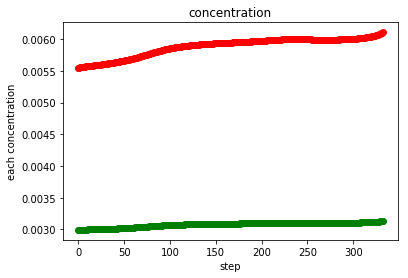

In [5]:
# Plot Ci_alpha and Ci_beta
plt.plot(a, 'ro', b, 'go')
plt.xlabel('step')
plt.ylabel('each concentration')
plt.title('concentration')
plt.show()

In [6]:
# Calculate D_alpha and D_beta
DA = []
DB = []
for i in range(1,332):
    s1 = 0
    s2 = 0
    s1 += np.float64((a[i+1]-a[i]))/np.float64((a[i+1]-1.99*a[i]+a[i-1]))*(dx)**2/dt
    s2 += np.float64((b[i+1]-b[i]))/np.float64((b[i+1]-1.99*b[i]+b[i-1]))*(dx)**2/dt
    DA.append(s1)
    DB.append(s2)
DA = pd.DataFrame(DA)
DB = pd.DataFrame(DB)

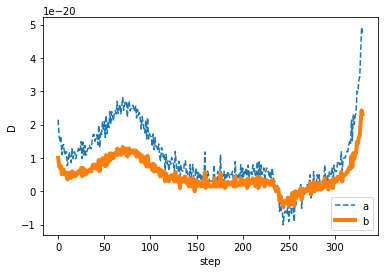

In [7]:
# Plot D_alpha and D_beta
line1, = plt.plot(DA, label="a", linestyle='--')
line2, = plt.plot(DB, label="b", linewidth=4)
plt.xlabel('step')
plt.ylabel('D')
#plt.title('D')
plt.legend(handles=[line1, line2], loc=4)
plt.show()